### Loading packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
import datetime

### Importing the files

In [2]:
db_store = pd.read_csv("DA1920_store.csv")
db_train = pd.read_csv("DA1920_train.csv")
db_test = pd.read_csv("DA1920_test.csv")

C:\Users\fer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Exploring the unmerged data

In [3]:
db_test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0


In [4]:
db_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [5]:
db_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Unnamed: 10,Unnamed: 11
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,NaN,
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",NaN,NaN
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,NaN,NaN


### Merging the datasets

In [6]:
dbj1 = db_train.join(db_store.set_index("Store"),
              on = "Store"
             )
dbj1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Unnamed: 10,Unnamed: 11
0,1,5,31/07/2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,NaN,
1,2,5,31/07/2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",NaN,NaN
2,3,5,31/07/2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",NaN,NaN
3,4,5,31/07/2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,NaN,NaN
4,5,5,31/07/2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,NaN,NaN


In [7]:
len(dbj1.index)

1017209

### Deleting the 'unnamed' columns

In [8]:
dbj1 = dbj1.drop(columns = ['Unnamed: 10', 'Unnamed: 11'])
dbj1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31/07/2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,31/07/2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31/07/2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31/07/2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,31/07/2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Counting missing data points in every column

In [9]:
dbj1.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

### Creating dummy variables

#### For time variables

- Creating dummies for the day of the week, default is Monday

In [10]:
dbj1 = pd.concat([dbj1, pd.get_dummies(dbj1['DayOfWeek'], drop_first = True)], axis = 1)
dbj1 = dbj1.drop(columns = ['DayOfWeek'])
dbj1.rename(columns = {2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}, inplace=True)
dbj1.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,31/07/2015,5263,555,1,1,0,1,c,a,...,0,NaN,NaN,NaN,0,0,0,1,0,0
1,2,31/07/2015,6064,625,1,1,0,1,a,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,0,0,1,0,0
2,3,31/07/2015,8314,821,1,1,0,1,a,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,0,0,1,0,0
3,4,31/07/2015,13995,1498,1,1,0,1,c,c,...,0,NaN,NaN,NaN,0,0,0,1,0,0
4,5,31/07/2015,4822,559,1,1,0,1,a,a,...,0,NaN,NaN,NaN,0,0,0,1,0,0


- Creating dummies for the month, default is January

In [11]:
#%%time
dbj1['month'] = pd.DatetimeIndex(dbj1['Date']).month
dbj1 = pd.concat([dbj1, pd.get_dummies(dbj1['month'],drop_first = True)], axis = 1)
dbj1 = dbj1.drop(columns = ['month'])
dbj1.rename(columns = {2:'Feb.', 3: 'Mar.', 4: 'Apr.', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug.', 9: 'Sept.', 10:'Oct.', 11: 'Nov.', 12: 'Dec'}, inplace=True)
dbj1.columns

Index(['Store', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Feb.', 'Mar.',
       'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec'],
      dtype='object')

- Creating dummies for the year, default is 2013

In [12]:
dbj1['Year'] = pd.DatetimeIndex(dbj1['Date']).year
dbj1 = pd.concat([dbj1, pd.get_dummies(dbj1['Year'],drop_first = True)], axis = 1)
dbj1 = dbj1.drop(columns = ['Year'])
dbj1.columns

Index([                    'Store',                      'Date',
                           'Sales',                 'Customers',
                            'Open',                     'Promo',
                    'StateHoliday',             'SchoolHoliday',
                       'StoreType',                'Assortment',
             'CompetitionDistance', 'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear',                    'Promo2',
                 'Promo2SinceWeek',           'Promo2SinceYear',
                   'PromoInterval',                   'Tuesday',
                       'Wednesday',                  'Thursday',
                          'Friday',                  'Saturday',
                          'Sunday',                      'Feb.',
                            'Mar.',                      'Apr.',
                             'May',                      'June',
                            'July',                      'Aug.',
                         

#### For other variables

- Creating dummies for the Assortment available, default is a

In [13]:
dbj1 = pd.concat([dbj1, pd.get_dummies(dbj1['Assortment'],drop_first = True)], axis = 1)
dbj1 = dbj1.drop(columns = ['Assortment'])
dbj1.columns

Index([                    'Store',                      'Date',
                           'Sales',                 'Customers',
                            'Open',                     'Promo',
                    'StateHoliday',             'SchoolHoliday',
                       'StoreType',       'CompetitionDistance',
       'CompetitionOpenSinceMonth',  'CompetitionOpenSinceYear',
                          'Promo2',           'Promo2SinceWeek',
                 'Promo2SinceYear',             'PromoInterval',
                         'Tuesday',                 'Wednesday',
                        'Thursday',                    'Friday',
                        'Saturday',                    'Sunday',
                            'Feb.',                      'Mar.',
                            'Apr.',                       'May',
                            'June',                      'July',
                            'Aug.',                     'Sept.',
                         

- Creating dummies for the Promo Interval, default is no promo

In [14]:
dbj1 = pd.concat([dbj1, pd.get_dummies(dbj1['PromoInterval'])], axis = 1)
dbj1 = dbj1.drop(columns = ['PromoInterval'])
dbj1.columns

Index([                    'Store',                      'Date',
                           'Sales',                 'Customers',
                            'Open',                     'Promo',
                    'StateHoliday',             'SchoolHoliday',
                       'StoreType',       'CompetitionDistance',
       'CompetitionOpenSinceMonth',  'CompetitionOpenSinceYear',
                          'Promo2',           'Promo2SinceWeek',
                 'Promo2SinceYear',                   'Tuesday',
                       'Wednesday',                  'Thursday',
                          'Friday',                  'Saturday',
                          'Sunday',                      'Feb.',
                            'Mar.',                      'Apr.',
                             'May',                      'June',
                            'July',                      'Aug.',
                           'Sept.',                      'Oct.',
                         

### Exporting the data

In [59]:
dbj1.to_csv("dbji.csv")

### Problems with promos? (No, problem with Nathan)

In [15]:
len(dbj1.loc[(dbj1["Promo2"] == 0) & ((dbj1["Feb,May,Aug,Nov"] == 1) | (dbj1["Jan,Apr,Jul,Oct"] == 1)|(dbj1["Mar,Jun,Sept,Dec"] == 1))])

0

### When stores are closed, are there any sales or customers?

In [119]:
dbj1.loc[(dbj1["Open"] == 0) & (dbj1["Sales"] > 0),["Sales"]]

,Sales


In [17]:
dbj1.loc[(dbj1["Open"] == 0) & (dbj1["Customers"] > 0),["Customers"]]

,Customers


### Some descriptive graphics

In [113]:
#Clean StateHoliday variable
dbj1.loc[dbj1["StateHoliday"] == "0",
              "StateHoliday"] = 0

In [145]:
st = pd.DataFrame(db_store.StoreType.value_counts()).sort_index()

pr = pd.DataFrame(dbj1.Promo.value_counts()).sort_index()

p2 = pd.DataFrame(dbj1.Promo2.value_counts()).sort_index()

p2w = pd.DataFrame(dbj1.Promo2SinceWeek.value_counts()).sort_index()

p2y = pd.DataFrame(dbj1.Promo2SinceYear.value_counts()).sort_index()

cm = pd.DataFrame(dbj1.CompetitionOpenSinceMonth.value_counts()).sort_index()

cy = pd.DataFrame(dbj1.CompetitionOpenSinceYear.value_counts()).sort_index()

op = pd.DataFrame(dbj1.Open.value_counts()).sort_index()

sho = pd.DataFrame(dbj1.StateHoliday.value_counts())

sch = pd.DataFrame(dbj1.SchoolHoliday.value_counts()).sort_index()

- Store Type

Text(0.5, 1.0, 'Store Type')

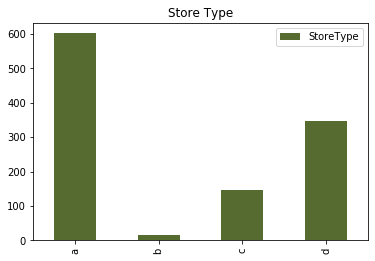

In [146]:
st.plot.bar(color='darkolivegreen', ecolor='black').set_title("Store Type")

- Open and holidays

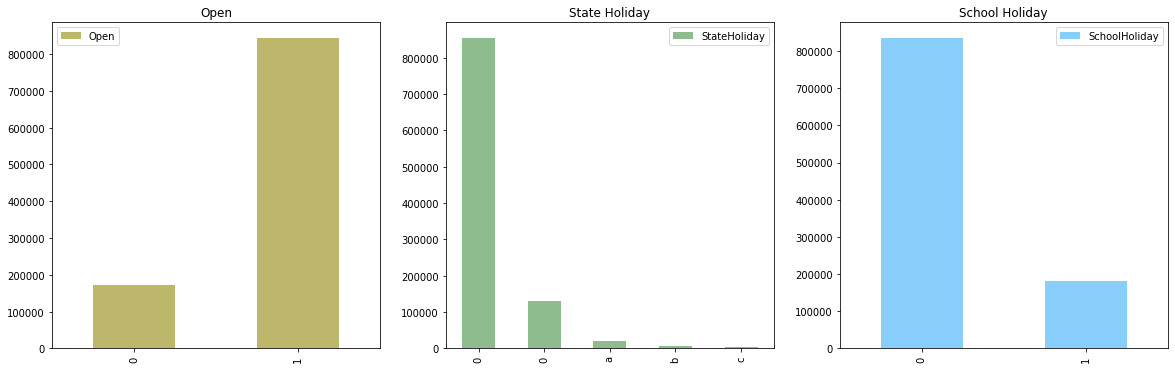

In [112]:
f, axs = plot.subplots(1,3, figsize=(20, 6))

ax = axs[0]
op.plot.bar(color='darkkhaki', ecolor='black',ax=ax)
ax.set_title("Open")

ax = axs[1]
sho.plot.bar(color='darkseagreen', ecolor='black',ax=ax)
ax.set_title("State Holiday")

ax = axs[2]
sch.plot.bar(color='lightskyblue', ecolor='black',ax=ax)
ax.set_title("School Holiday")

plot.show()

Open stores in Holidays

In [139]:
pd.crosstab(dbj1.Open, dbj1.StateHoliday, margins=False)

StateHoliday,0,a,b,c
Open,,,,
0,142677,19566,6545,4029
1,843482,694,145,71


In [140]:
pd.crosstab(dbj1.Open, dbj1.SchoolHoliday, margins=False)

SchoolHoliday,0,1
Open,,
0,154553,18264
1,680935,163457


- Promotions

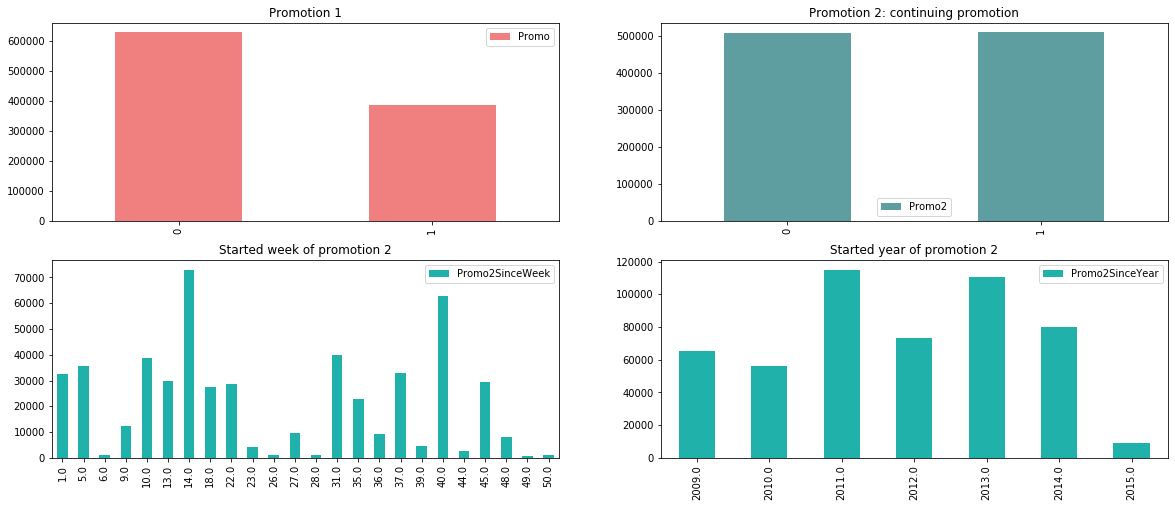

In [147]:
f, ax = plot.subplots(2,2, figsize=(20, 8))

pr.plot.bar(color='lightcoral', ecolor='black', ax=ax[0,0]).set_title("Promotion 1")

p2.plot.bar(color='cadetblue', ecolor='black', ax=ax[0,1]).set_title("Promotion 2: continuing promotion")

p2w.plot.bar(color='lightseagreen', ecolor='black', ax=ax[1,0]).set_title("Started week of promotion 2")

p2y.plot.bar(color='lightseagreen', ecolor='black', ax=ax[1,1]).set_title("Started year of promotion 2")

plot.show()

In [143]:
pd.crosstab(dbj1.Promo, dbj1.Promo2, margins=False)

Promo2,0,1
Promo,,
0,313967,315162
1,194064,194016


- Competition

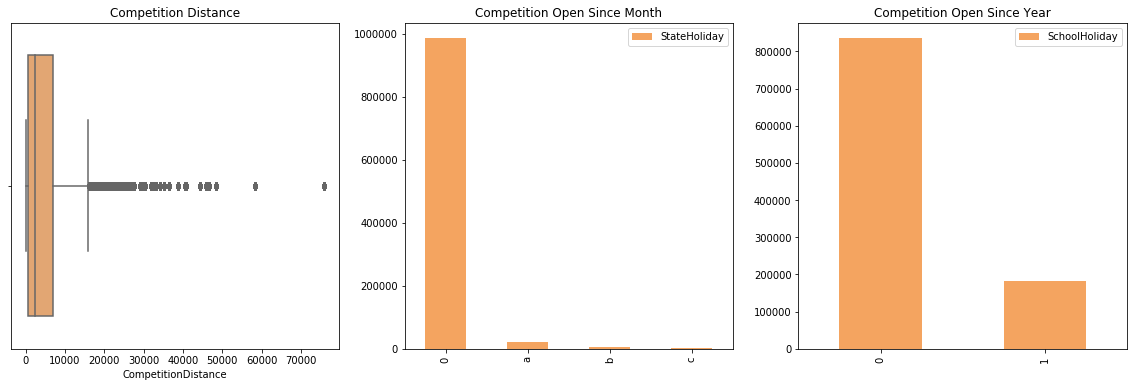

In [117]:
f, axs = plot.subplots(1,3, figsize=(20, 6))

ax = axs[0]
sns.boxplot(dbj1['CompetitionDistance'], color='sandybrown', ax=ax)
ax.set_title("Competition Distance")

ax = axs[1]
sho.plot.bar(color='sandybrown', ecolor='black',ax=ax)
ax.set_title("Competition Open Since Month")

ax = axs[2]
sch.plot.bar(color='sandybrown', ecolor='black',ax=ax)
ax.set_title("Competition Open Since Year")

plot.show()


# Outliers

In [48]:
#dbj1.info()

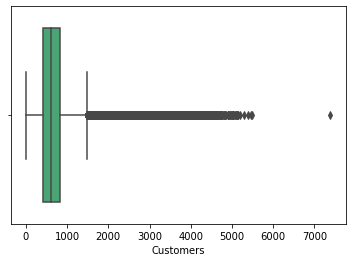

In [50]:
sns.boxplot(dbj1['Customers'], color='mediumseagreen')

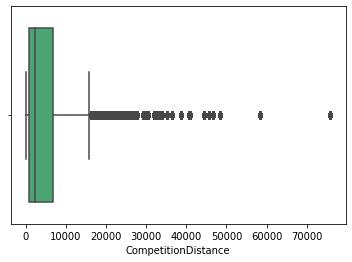

In [52]:
sns.boxplot(dbj1['CompetitionDistance'], color='mediumseagreen')

### Le Heatmap de Laura

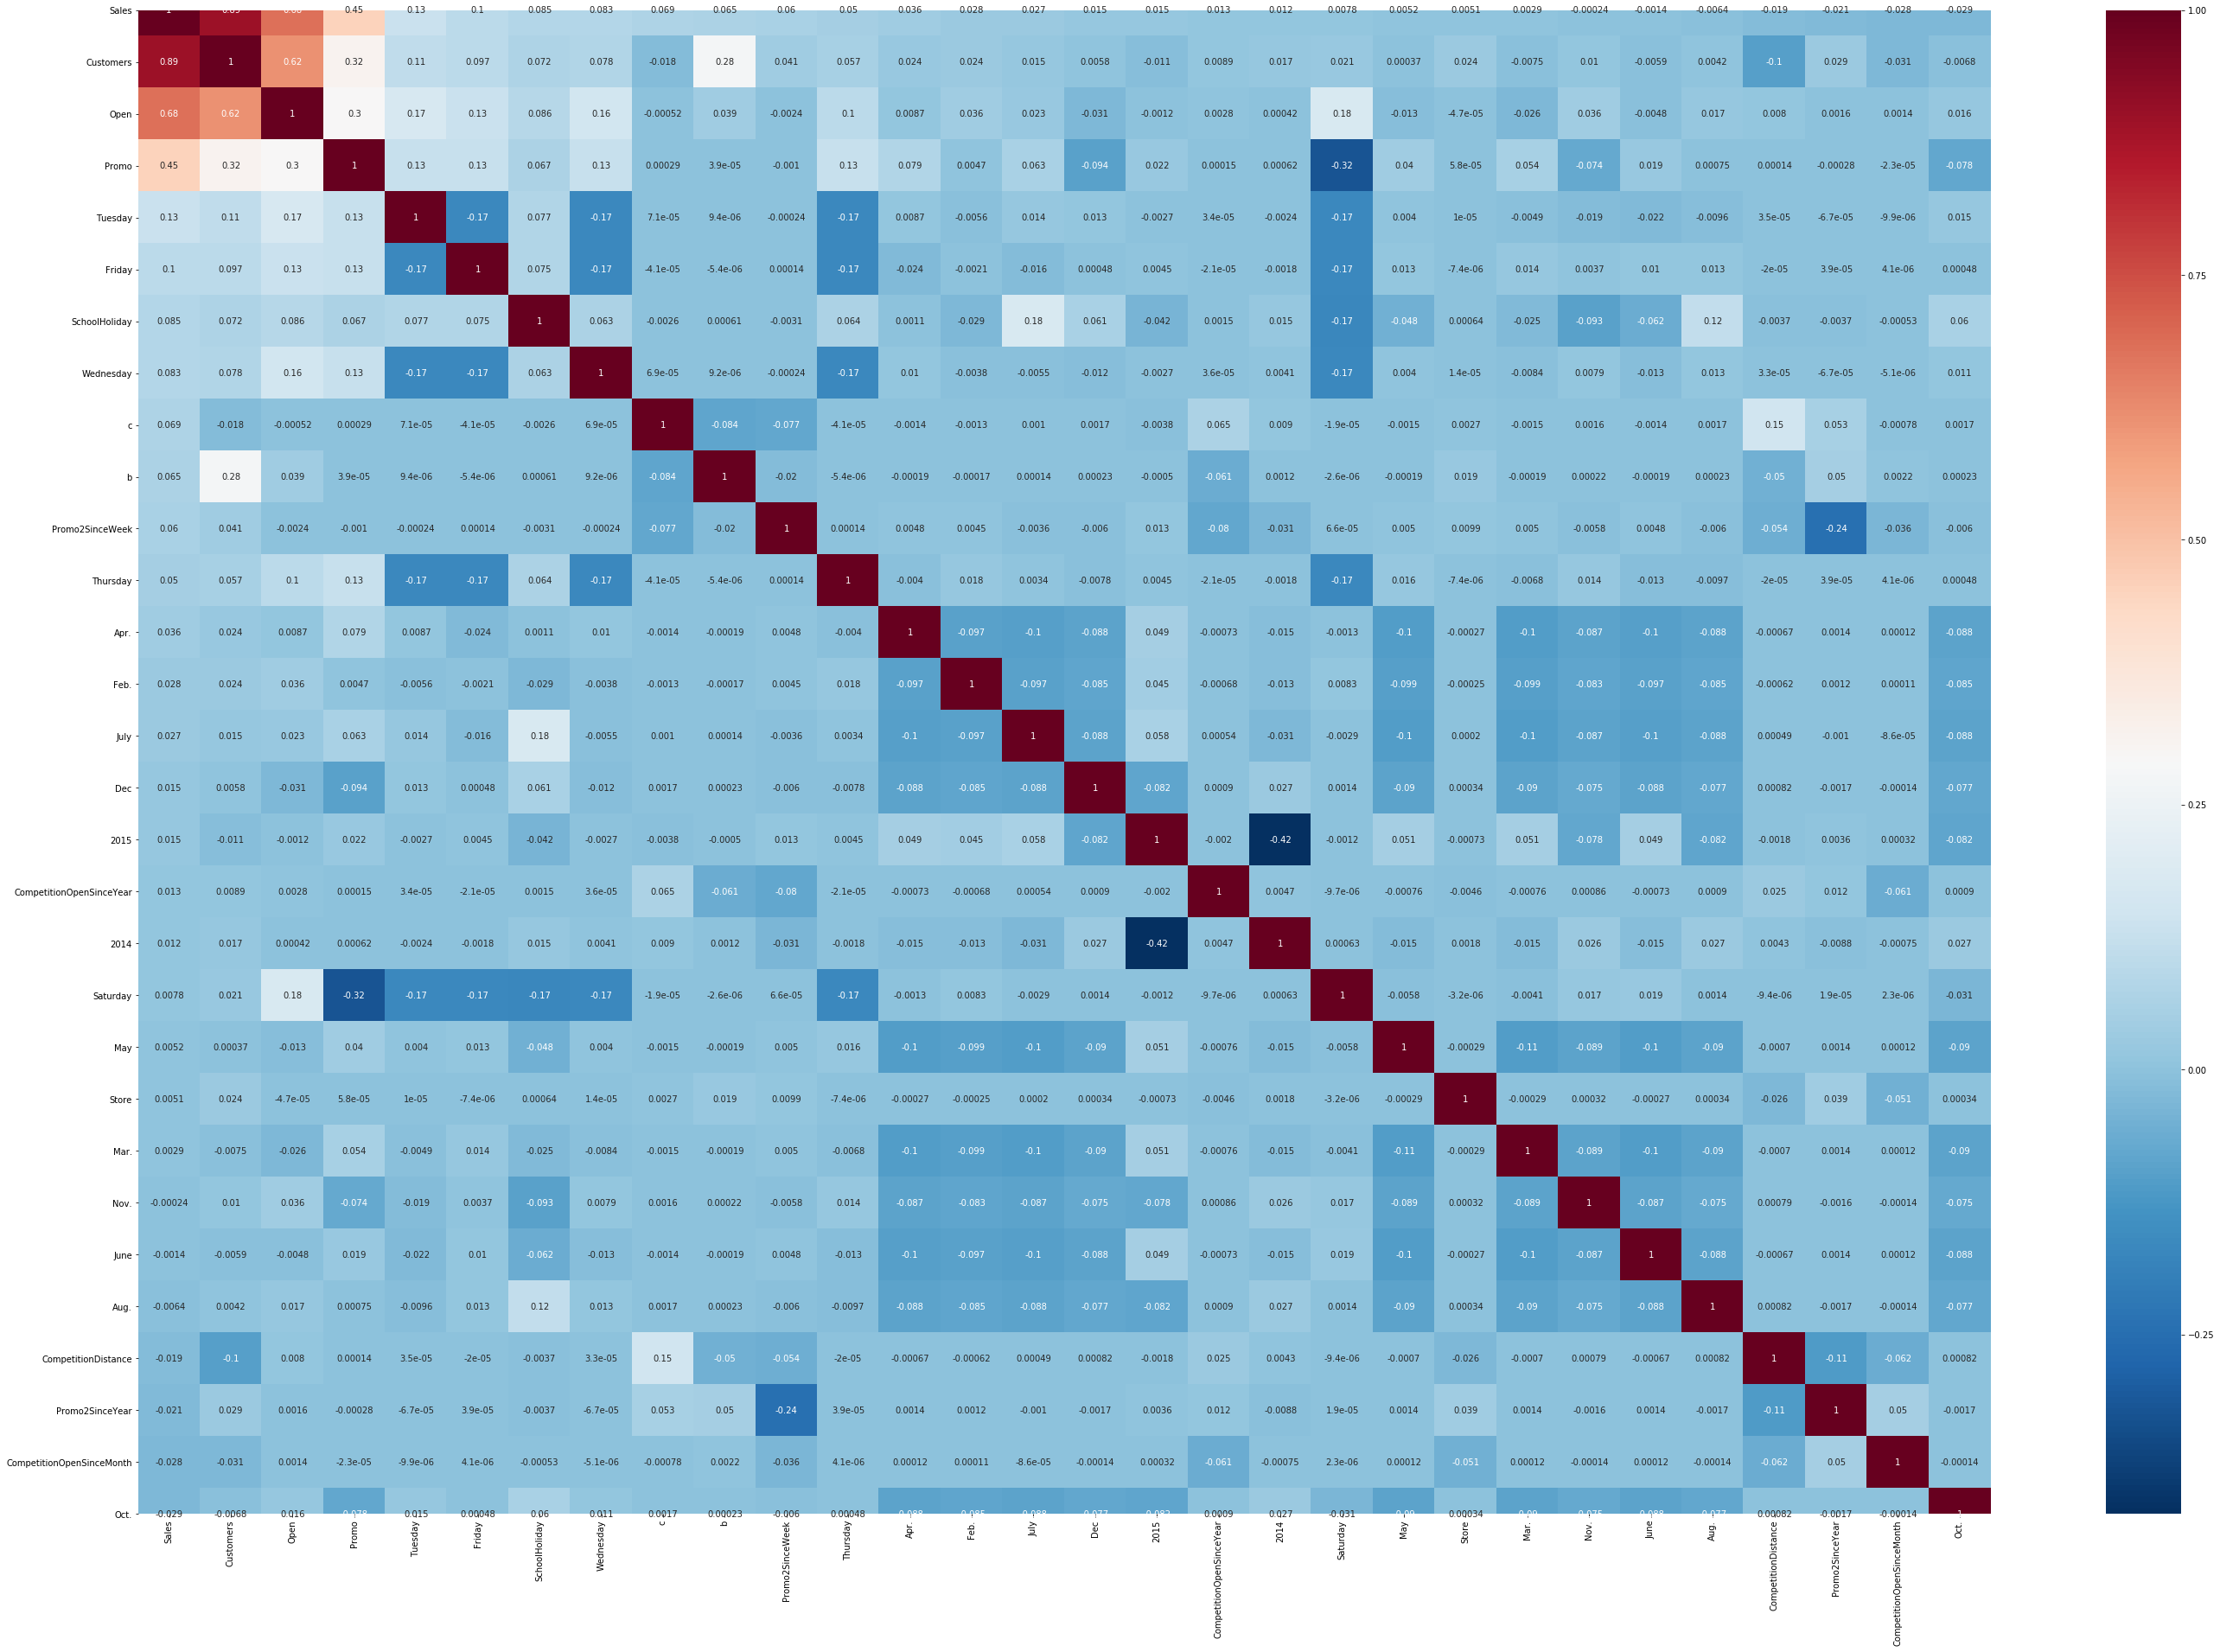

In [225]:
k = 30
#create a list called cols. that looks for the 10 largest correlations to SalePrice in the dataset . 
cols = dbj1.corr().nlargest(k, 'Sales')['Sales'].index
#create a correlation matrix using the list of columns created above. 
k_corr_matrix = dbj1[cols].corr()
#plot the figure with given dimensions. 
plot.figure(figsize=(48, 32))
#display the correlation matrix using seaborn's heatmap function. plot strength from red to blue.
sns.heatmap(k_corr_matrix, annot=True, cmap=plot.cm.RdBu_r)